In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
import statsmodels

In [23]:
zl_report_all=pd.read_csv(r'C:\TM1py\zl_amazon_payments_data_report.csv')

In [4]:
zl_report_all

,Scenario,SA Year,SA Month,Version,COA Company,Currency,Country,Product,Platform,ZL Amazon Management Report Item,Data Source Payments Data Report,M ZL Amazon Payments Data Report,Value
0,ACT,2018,M01,WIP,2,USD,US,LSKU1787,7,AMZ SP广告费分摊,Base,Amount,278.9424
1,ACT,2018,M01,WIP,2,USD,US,LSKU1787,7,AMZ SD广告费分摊,Base,Amount,43.1232
2,ACT,2018,M01,WIP,2,USD,US,LSKU1284,7,AMZ SP广告费分摊,Base,Amount,161.3496
3,ACT,2018,M01,WIP,2,USD,US,LSKU1284,7,AMZ SD广告费分摊,Base,Amount,0.2784
4,ACT,2018,M01,WIP,2,USD,US,LSKU1931,7,AMZ SP广告费分摊,Base,Amount,79.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706997,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1179,5,销售数量(不含退货),Base,Amount,1.0000
6706998,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1904,5,退货数量,Base,Amount,-1.0000
6706999,Forecast,2021,M12,WIP,2,No Currency,SE,LSKU1303,5,销售数量(不含退货),Base,Amount,1.0000
6707000,Forecast,2021,M12,WIP,2,No Currency,TR,LSKU1929,6,销售数量(不含退货),Base,Amount,1.0000


In [5]:
zl_report_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707002 entries, 0 to 6707001
Data columns (total 13 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Scenario                          object 
 1   SA Year                           int64  
 2   SA Month                          object 
 3   Version                           object 
 4   COA Company                       int64  
 5   Currency                          object 
 6   Country                           object 
 7   Product                           object 
 8   Platform                          int64  
 9   ZL Amazon Management Report Item  object 
 10  Data Source Payments Data Report  object 
 11  M ZL Amazon Payments Data Report  object 
 12  Value                             float64
dtypes: float64(1), int64(3), object(9)
memory usage: 665.2+ MB


### 销售分析

#### 筛选ACT数据中的销售数量并转换为时间序列

In [24]:
def generate_timeseries(df:'pd.DataFrame'):
    df_act=df[(df['Scenario']=='ACT')&(df['ZL Amazon Management Report Item']=='销售数量(不含退货)')]
    #日期处理
    df_act.loc[:,'SA Year']=df_act['SA Year'].astype('str')
    df_act.loc[:,'yearmonth']=df_act['SA Year']+'-'+df_act['SA Month'].str.slice(1,3)
    df_act.loc[:,'yearmonth']=pd.to_datetime(df_act['yearmonth'])
    timeseries=df_act.groupby('yearmonth')['Value'].sum()
    return timeseries

In [25]:
timeseries=generate_timeseries(zl_report_all)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [26]:
timeseries

yearmonth
2018-01-01     50378.0
2018-02-01     44338.0
2018-03-01     39846.0
2018-04-01     39418.0
2018-05-01     65978.0
2018-06-01     49436.0
2018-07-01     55310.0
2018-08-01     47286.0
2018-09-01     34064.0
2018-10-01     33538.0
2018-11-01     53328.0
2018-12-01    113544.0
2019-01-01     46916.0
2019-02-01     48016.0
2019-03-01     44968.0
2019-04-01     56788.0
2019-05-01     72704.0
2019-06-01     68478.0
2019-07-01     70376.0
2019-08-01     60460.0
2019-09-01     66152.0
2019-10-01     64344.0
2019-11-01     88596.0
2019-12-01    191508.0
2020-01-01     70190.0
2020-02-01     58234.0
2020-03-01     67362.0
2020-04-01    121244.0
2020-05-01    190848.0
2020-06-01    180362.0
2020-07-01    201000.0
2020-08-01    224192.0
2020-09-01    214426.0
2020-10-01    253198.0
2020-11-01    328624.0
2020-12-01    597592.0
2021-01-01    272982.0
2021-02-01    231742.0
2021-03-01    262670.0
2021-04-01    254064.0
2021-05-01    317472.0
2021-06-01    251990.0
2021-07-01    201108.0
2

### 可视化时间序列

In [7]:
def timeseries_display(s:'pd.Series'):
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.xlabel('Date',fontdict={'fontsize':20,'color':'white'})
    plt.ylabel('Quantity',fontdict={'fontsize':20,'color':'white'})
    plt.title('ZL 销售量时间序列',loc='center',fontdict={'family':'simhei','size':'20','color':'white'})
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
    plt.rcParams['font.size']='10'#修改轴上的字体大小
    plt.plot(s,marker='o')
    plt.show()

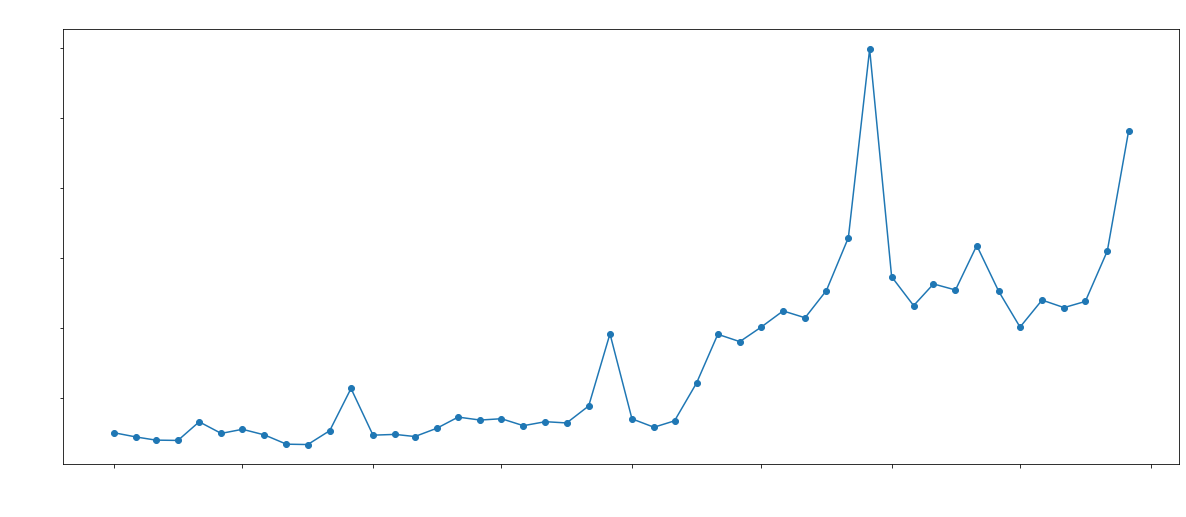

In [8]:
timeseries_display(timeseries)

### 按国家分类可视化

In [60]:
def timeseries_display_by_country(df:'pd.DataFrame',country:str):
    def generate_timeseries(df:'pd.DataFrame',country:str):
        if country=='':
            df_act=df[(df['Scenario']=='ACT')&(df['ZL Amazon Management Report Item']=='销售数量(不含退货)')]
        else:
            
            df_act=df[(df['Scenario']=='ACT')&(df['ZL Amazon Management Report Item']=='销售数量(不含退货)')&(df['Country']==country)]
        #日期处理
        df_act.loc[:,'SA Year']=df_act['SA Year'].astype('str')
        df_act.loc[:,'yearmonth']=df_act['SA Year']+'-'+df_act['SA Month'].str.slice(1,3)
        df_act.loc[:,'yearmonth']=pd.to_datetime(df_act['yearmonth'])
        timeseries=df_act.groupby('yearmonth')['Value'].sum()
        return timeseries
    timeseries=generate_timeseries(df,country)
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.xlabel('Date',fontdict={'fontsize':20,'color':'white'})
    plt.ylabel('Quantity',fontdict={'fontsize':20,'color':'white'})
    plt.title('ZL 销售量时间序列'+country,loc='center',fontdict={'family':'simhei','size':'20','color':'white'})
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
    plt.rcParams['font.size']='10'#修改轴上的字体大小
    plt.plot(timeseries,marker='o')
    plt.show()
    return timeseries

#### 全部国家

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


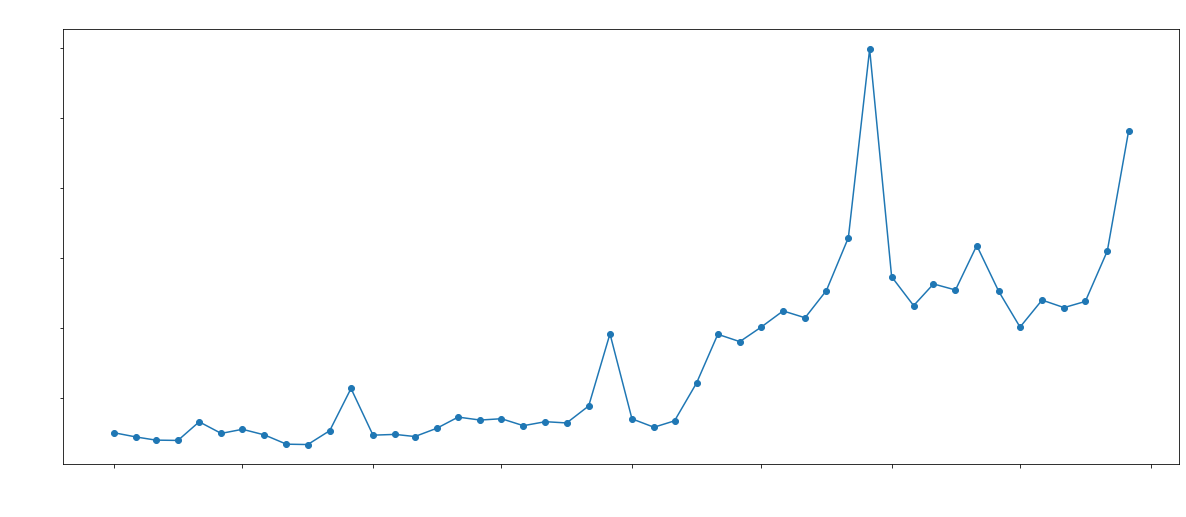

In [61]:
ts=timeseries_display_by_country(zl_report_all,'')

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


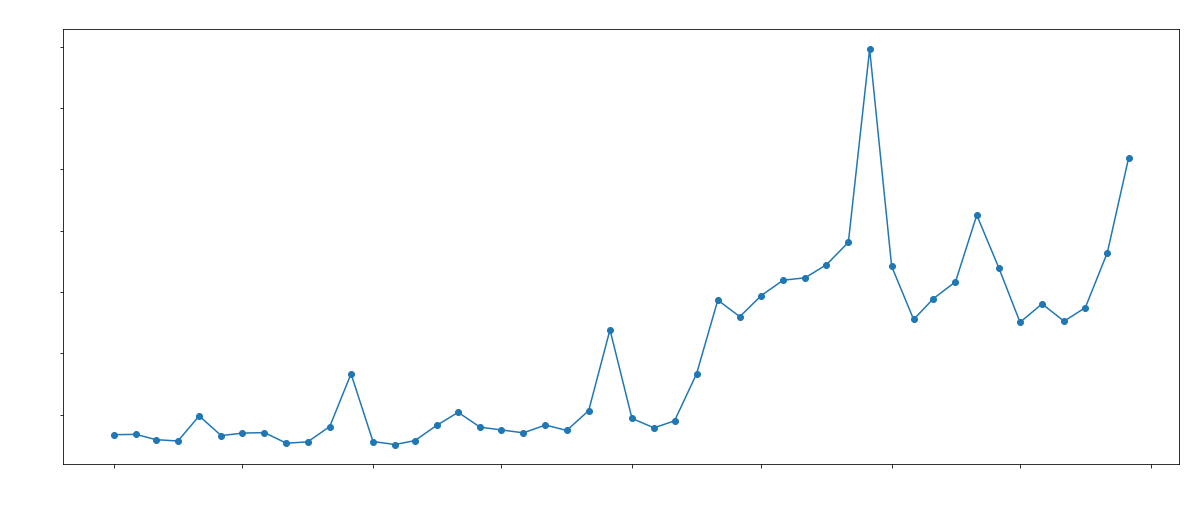

In [73]:
ts_us=timeseries_display_by_country(zl_report_all,'US')

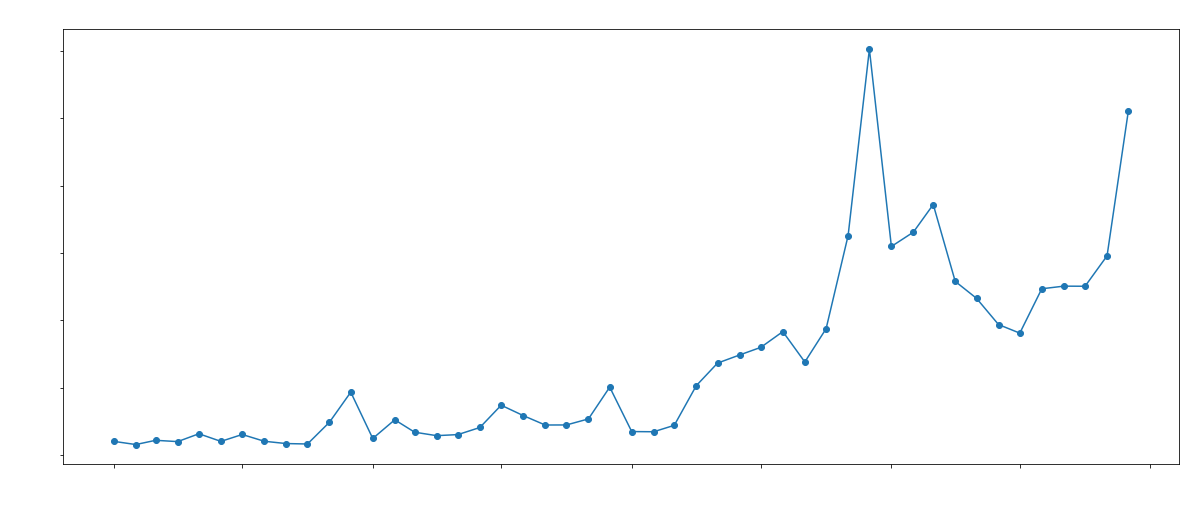

In [74]:
ts_uk=timeseries_display_by_country(zl_report_all,'UK')

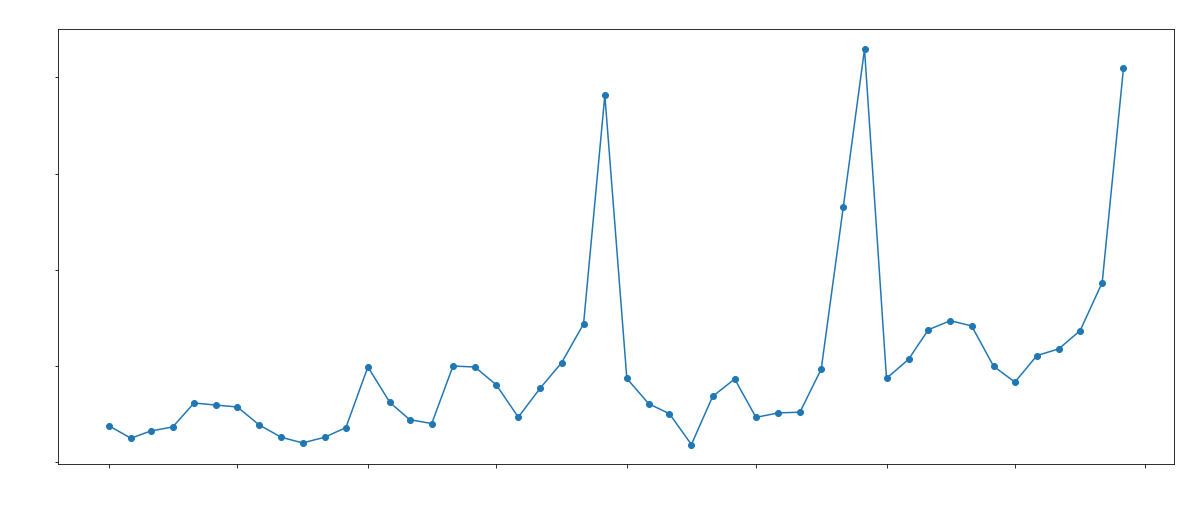

In [75]:
ts_fr=timeseries_display_by_country(zl_report_all,'FR')

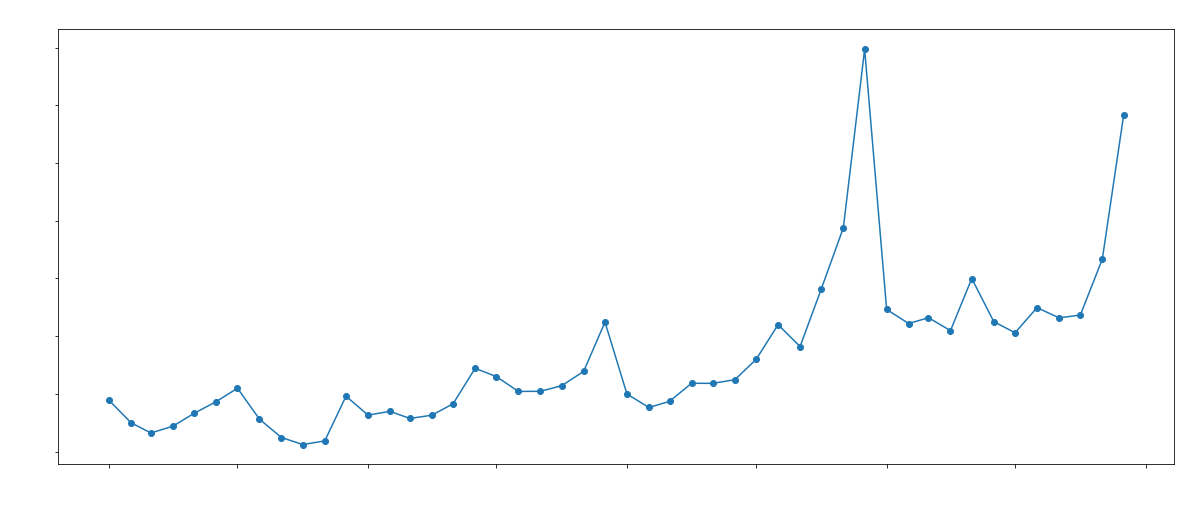

In [76]:
ts_de=timeseries_display_by_country(zl_report_all,'DE')

### 时间序列分解

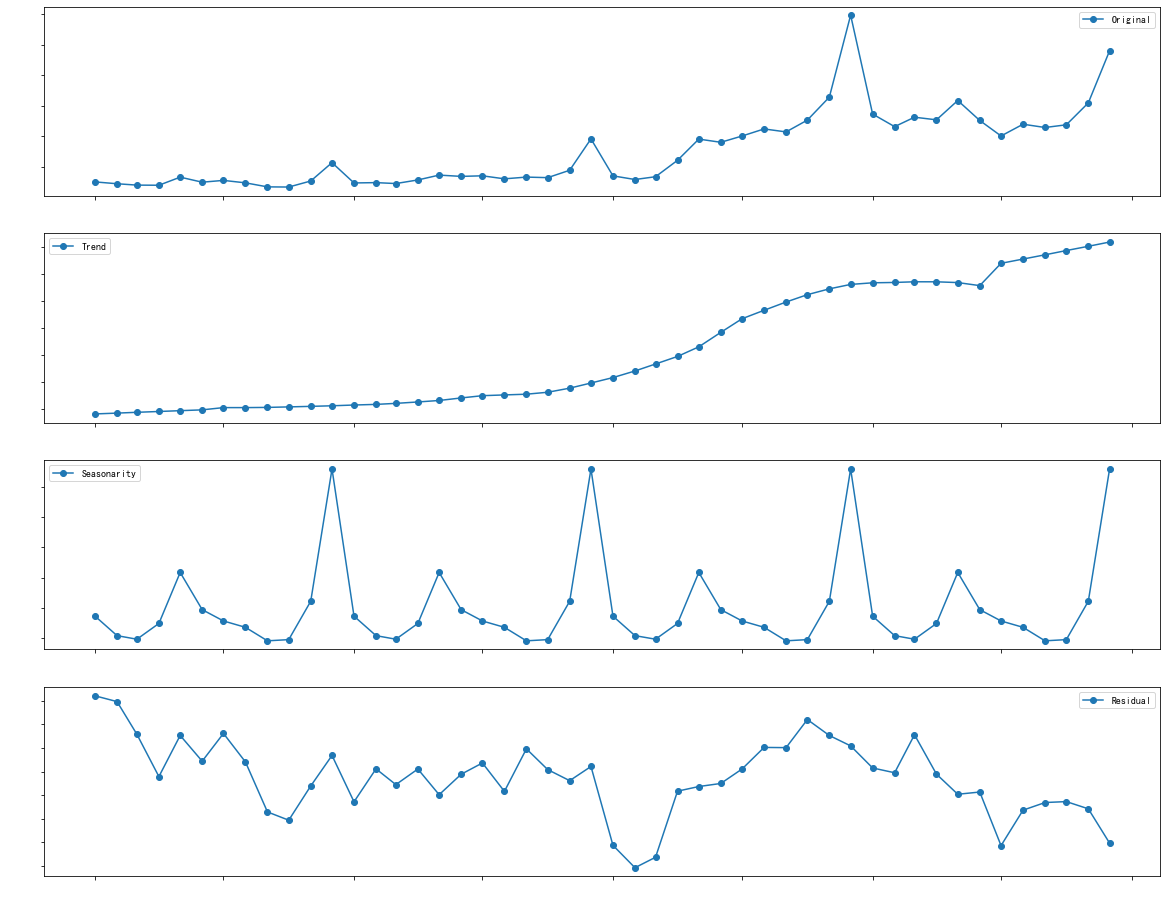

In [119]:
def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries,extrapolate_trend='freq',model='multilicative')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(20, 16))
    plt.subplot(411)
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.plot(timeseries, marker='o',label='Original')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.plot(trend, marker='o',label='Trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.plot(seasonal,marker='o', label='Seasonarity')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.plot(residual, marker='o',label='Residual')
    plt.legend(loc='best')
    plt.savefig(r'C:\TM1py\timeseries.png')
    plt.show()

decomposing(ts)


### 差分

timeseries_adf :  (-1.462944502439508, 0.5517560980218233, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 947.0046412907313)
timeseries_diff1_adf :  (-4.605855142338113, 0.00012599761038769702, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 937.4144063204548)
timeseries_diff2_adf :  (-4.472149333434063, 0.00022072548394188, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 930.2496908523527)


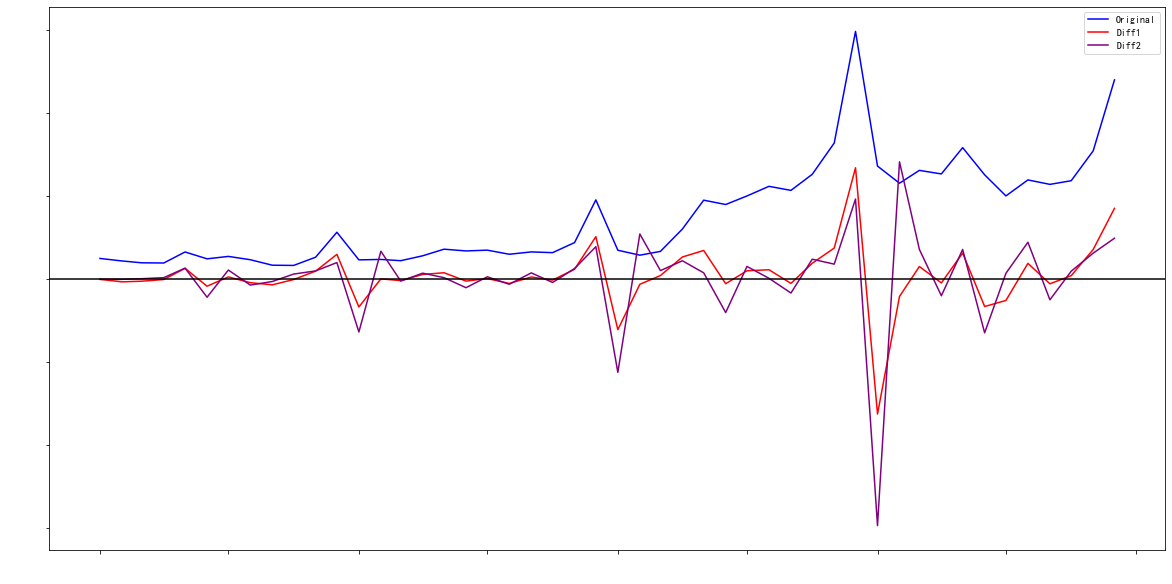

In [125]:
from statsmodels.tsa.stattools import adfuller as ADF


def diff_plot(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)


    timeseries_adf = ADF(timeseries.tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1.tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2.tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(20, 10))
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.axhline(y=0,c="black")#添加水平直线
    plt.legend(loc='best')
    plt.show()



diff_plot(ts)


### 查看自相关性

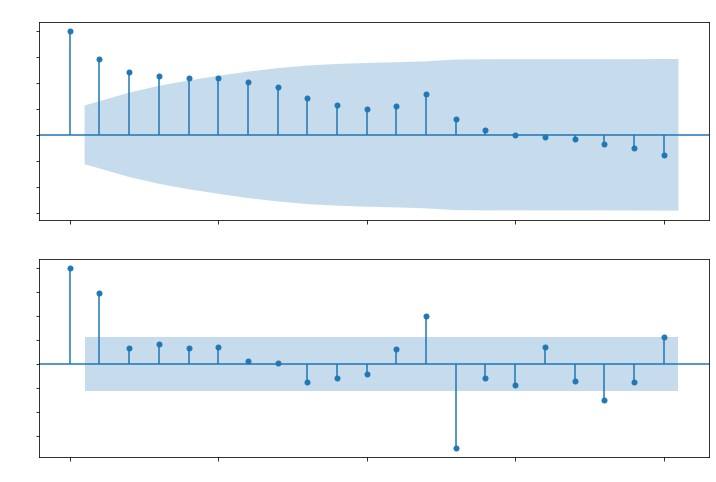

In [111]:
import statsmodels.api as sm
def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    ax1.set_title('',color='white')
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    ax2.set_title('',color='white')
    plt.xticks(rotation=20,color='white')
    plt.yticks(color='white')
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()


ts_diff1 = ts.diff(1)
ts_diff1 = ts_diff1.fillna(0)
autocorrelation(ts, 20)


### 使用一阶差分的数据进行预测建模

In [66]:
timeseries_diff1=timeseries.diff(1).dropna()

### AR滞后数与MA滞后数的确认

In [84]:
import statsmodels.api as sm
trend_evaluate=sm.tsa.arma_order_select_ic(timeseries_diff1, ic=["aic", "bic"])
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

trend AIC (1, 1)
trend BIC (1, 1)


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### 预测模型

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was pro

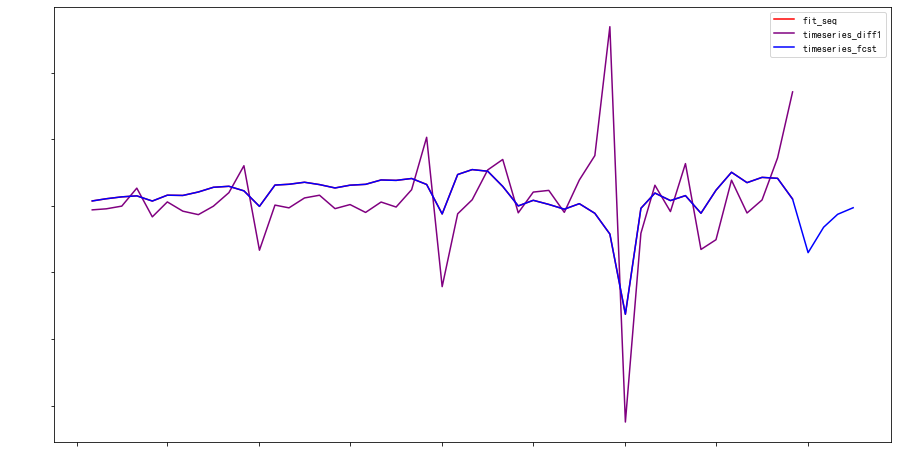

In [104]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
def ARIMA_Model(timeseries, order):
    model = ARMA(timeseries, order=order)
    model=model.fit()
    return model

trend_model = ARIMA_Model(timeseries_diff1, trend_evaluate.bic_min_order)
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2018-02-01', end='2022-04-01', dynamic=False)
plt.figure(figsize=(15,8))
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(trend_fit_seq, color='red', label='fit_seq')
plt.plot(timeseries_diff1,color='purple', label='timeseries_diff1')
plt.plot(trend_predict_seq,color='blue', label='timeseries_fcst')
plt.legend(loc='best')
plt.show()



### 模型效果检测


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


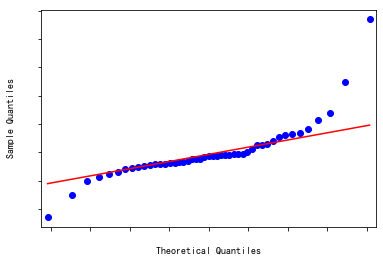

In [105]:
resid = trend_model.resid
from statsmodels.graphics.api import qqplot

qqplot(resid, line='q', fit=True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
#下图可以观察残差接近正态分布

### 差分还原

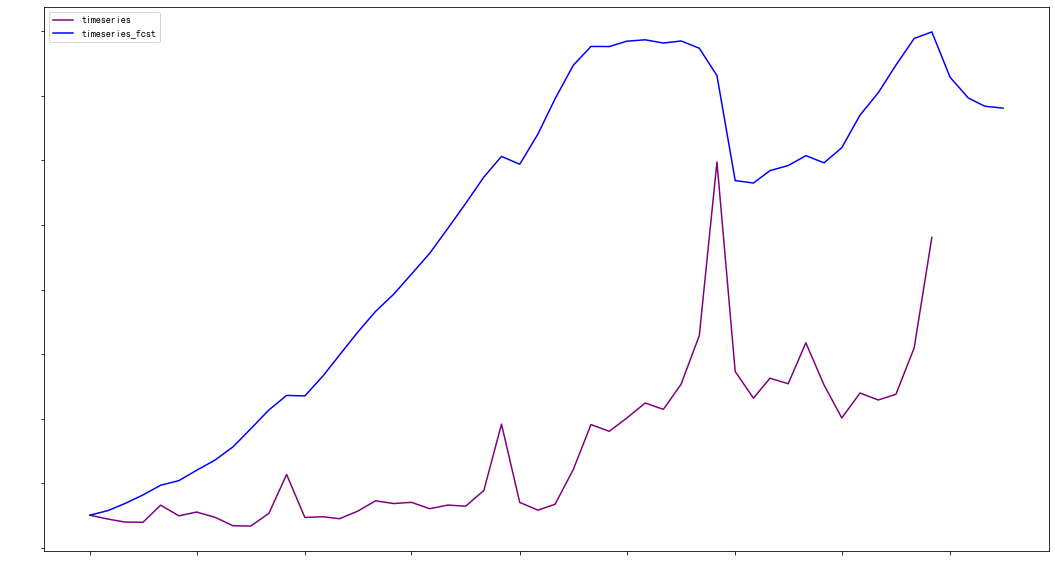

In [114]:
#一阶差分
import pandas as pd

time_series_restored = pd.Series([timeseries[0]], index=[timeseries.index[0]]) .append(trend_predict_seq).cumsum()

plt.figure(figsize=(18,10))
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(timeseries,color='purple', label='timeseries')
plt.plot(time_series_restored,color='blue', label='timeseries_fcst')
plt.legend(loc='best')
plt.show()

### 预测建模第二种方法 将时间序列拆分成趋势与残差进行训练

#### 分解

In [120]:
decomposition = seasonal_decompose(timeseries,extrapolate_trend='freq',model='multilicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

####  是否需要差分

timeseries_adf :  (0.9028423210455845, 0.9931273075004802, 1, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 778.1191274209749)
timeseries_diff1_adf :  (-4.183400312512187, 0.0007028527866731988, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 776.2096910115583)
timeseries_diff2_adf :  (-4.225737842958036, 0.0005958292605804503, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 778.0602097319133)


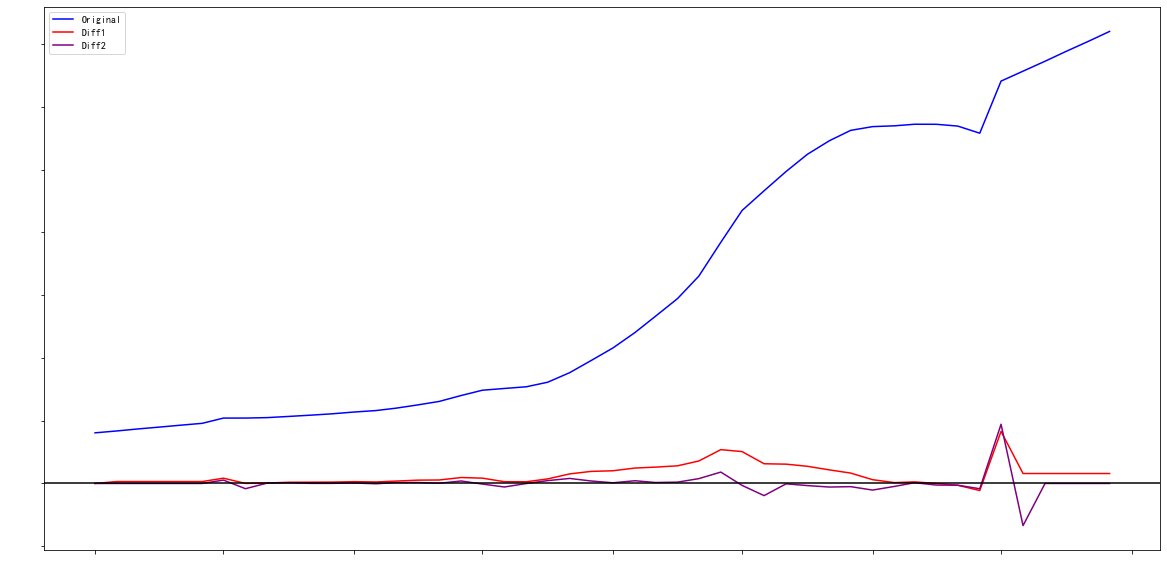

In [129]:
diff_plot(trend)
### 需要一阶差分
trend_diff1=trend.diff(1).dropna()

timeseries_adf :  (-3.228900238657155, 0.018371592947040695, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, -51.87716647765387)
timeseries_diff1_adf :  (-8.051098891935652, 1.7411870633556453e-12, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, -47.1170163860603)
timeseries_diff2_adf :  (-5.168239266462556, 1.0204220649735287e-05, 5, 42, {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}, -35.158762244079554)


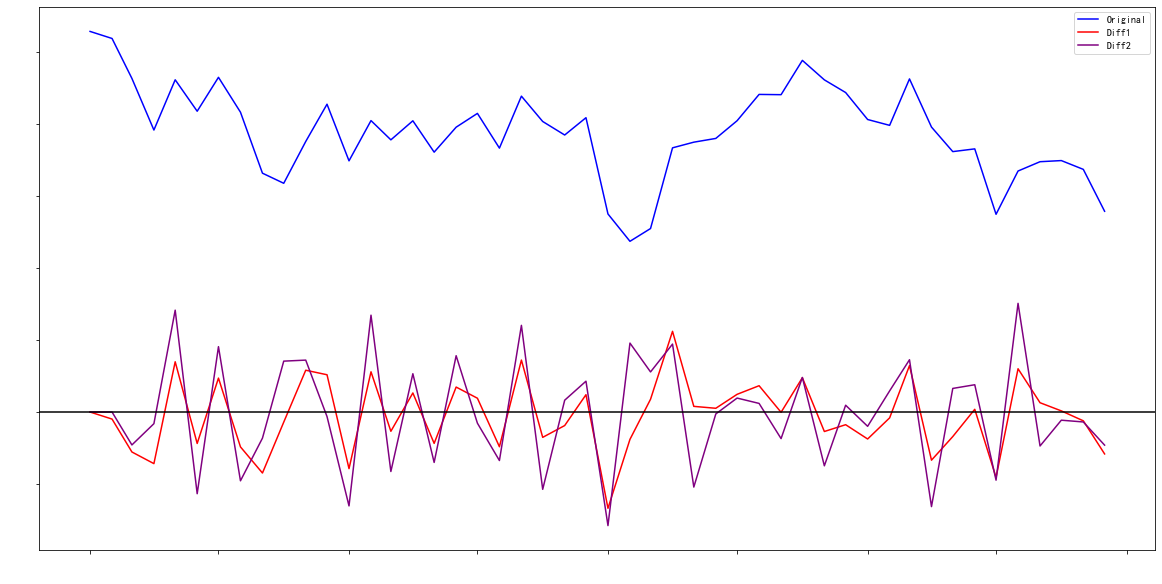

In [135]:
diff_plot(residual)
resid_diff1=residual.diff(1).dropna()

#### ARMA滞后数确认

In [136]:
import statsmodels.api as sm
trend_diff1_evaluate=sm.tsa.arma_order_select_ic(trend_diff1, ic=["aic", "bic"])
print('trend_diff1 AIC', trend_diff1_evaluate.aic_min_order)
print('trend_diff1 BIC', trend_diff1_evaluate.bic_min_order)

resid_diff1_evaluate=sm.tsa.arma_order_select_ic(resid_diff1, ic=["aic", "bic"])
print('resid_diff1 AIC', resid_diff1_evaluate.aic_min_order)
print('resid_diff1 BIC', resid_diff1_evaluate.bic_min_order)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

trend_diff1 AIC (1, 1)
trend_diff1 BIC (1, 0)


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

resid_diff1 AIC (1, 1)
resid_diff1 BIC (0, 0)


#### 预测模型

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was pro

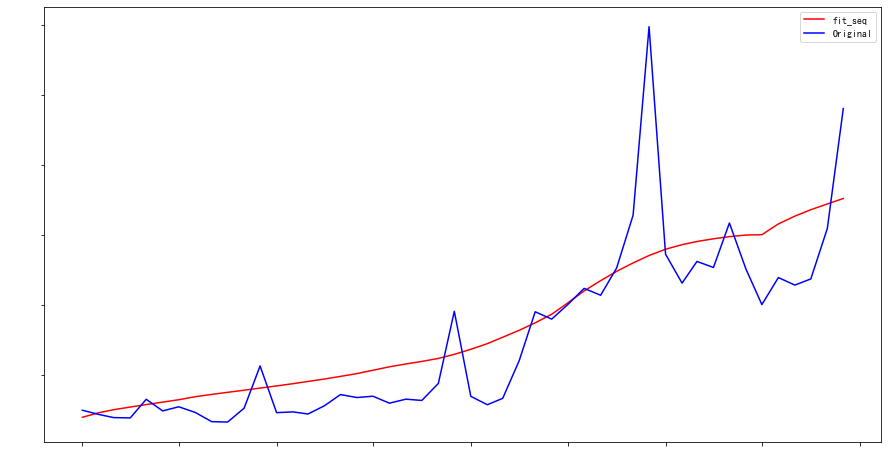

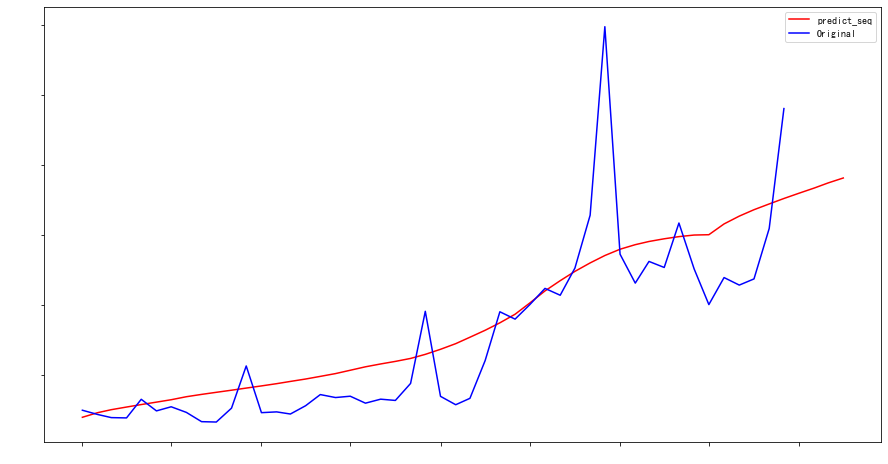

In [192]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
def ARIMA_Model(timeseries, order):
    model = ARMA(timeseries, order=order)
    model=model.fit()
    return model

trend_diff1_model = ARIMA_Model(trend_diff1, trend_diff1_evaluate.aic_min_order)
trend_diff1_fit_seq = trend_diff1_model.fittedvalues
#差分拟合还原
trend_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_fit_seq).cumsum()
trend_diff1_predict_seq = trend_diff1_model.predict(start='2018-02-01', end='2022-04-01', dynamic=False)
#差分预测还原
trend_predict_restored = pd.Series([trend[0]], index=[trend.index[0]]) .append(trend_diff1_predict_seq).cumsum()

resid_diff1_model = ARIMA_Model(resid_diff1, resid_diff1_evaluate.aic_min_order)
resid_diff1_fit_seq = resid_diff1_model.fittedvalues
#差分拟合还原
resid_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_fit_seq).cumsum()
resid_diff1_predict_seq = resid_diff1_model.predict(start='2018-02-01', end='2022-04-01', dynamic=False)
#差分预测还原
resid_predict_restored = pd.Series([residual[0]], index=[residual.index[0]]) .append(resid_diff1_predict_seq).cumsum()


#拟合训练集
# 拟合训练集
fit_seq = seasonal.add(trend_restored, fill_value=0)
fit_seq = fit_seq.add(resid_restored, fill_value=0)
plt.figure(figsize=(15,8))
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(timeseries, color='blue', label='Original')
plt.legend(loc='best')
plt.show()





#预测集
seasonal_expand=pd.Series(seasonal['2021-01-01':'2021-12-01'].to_list(),index=pd.date_range('2022-01-01',periods=12,freq='MS'))
seasonal_fcst=seasonal
seasonal_fcst.append(seasonal_expand)
predict_seq=seasonal_fcst['2018-01-01':'2022-04-01'].add(trend_predict_restored,fill_value=0)
predict_seq=predict_seq.add(resid_predict_restored,fill_value=0)
plt.figure(figsize=(15,8))
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(timeseries, color='blue', label='Original')
plt.legend(loc='best')
plt.show()


#### 模型效果检测

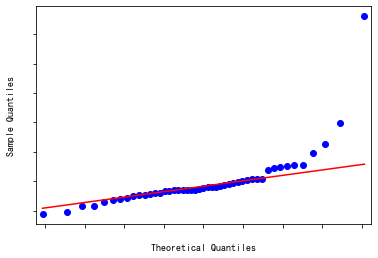

In [193]:
resid = trend_diff1_model.resid
from statsmodels.graphics.api import qqplot

qqplot(resid, line='q', fit=True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
#下图可以观察残差接近正态分布